In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tsvd = pd.read_parquet("zinc_res_tsvd.parquet")[["k_2", "k_4", "k_8"]]
lpca = pd.read_parquet("zinc_res_lpca.parquet")

KeyError: "None of [Index(['k_2', 'k_4', 'k_8'], dtype='object')] are in the [columns]"

In [46]:
def plot_nodes_error_k(data, k_list, title):
    plt.figure(figsize=(15, 9))
    for k in k_list:
        col_name = "k_" + str(k) 
        plt.errorbar(data.index, data[col_name]["mean"], yerr=data[col_name]["std"], fmt='-o', capsize=0.2, capthick=1, label=col_name)
        if len(data.index) > 200:
            plt.xticks(range(data.index.min(), data.index.max(), len(data.index) // 50), rotation=60)
        else:
            plt.xticks(data.index, rotation=60)
    plt.xlabel("Number of Nodes")
    plt.ylabel("Relative Reconstruction Error")
    plt.title(title)
    plt.legend()

In [22]:
k_list = [2, 4, 8]

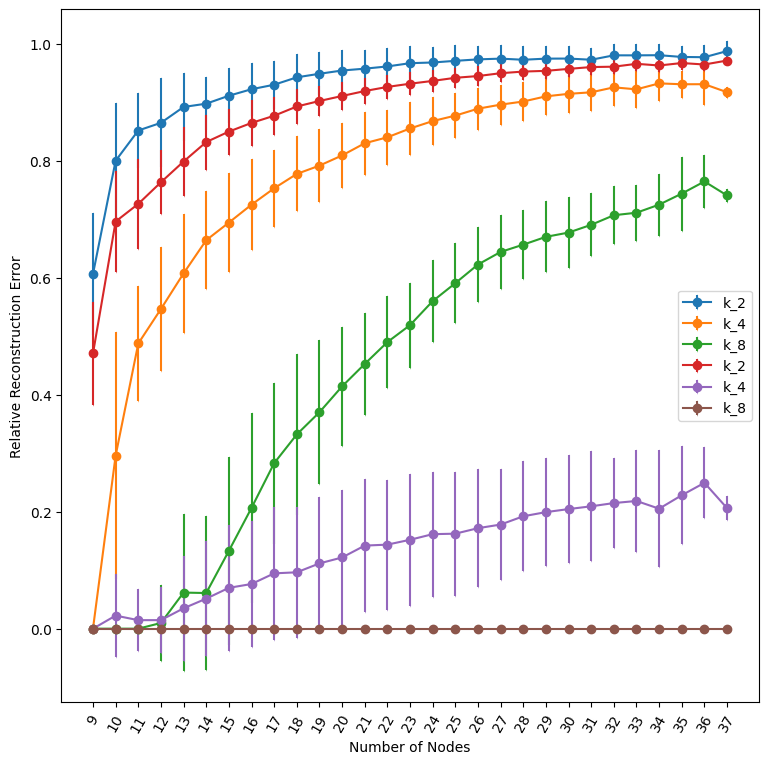

In [32]:
plt.figure(figsize=(9, 9))
for data in [tsvd, lpca]:
    for k in k_list:
        col_name = "k_" + str(k) 
        plt.errorbar(data.index, data[col_name]["mean"], yerr=data[col_name]["std"], fmt='-o', capsize=0.2, capthick=1, label=col_name)
        if len(data.index) > 200:
            plt.xticks(range(data.index.min(), data.index.max(), len(data.index) // 50), rotation=60)
        else:
            plt.xticks(data.index, rotation=60)
plt.xlabel("Number of Nodes")
plt.ylabel("Relative Reconstruction Error")
plt.legend()

In [20]:
plt.show()

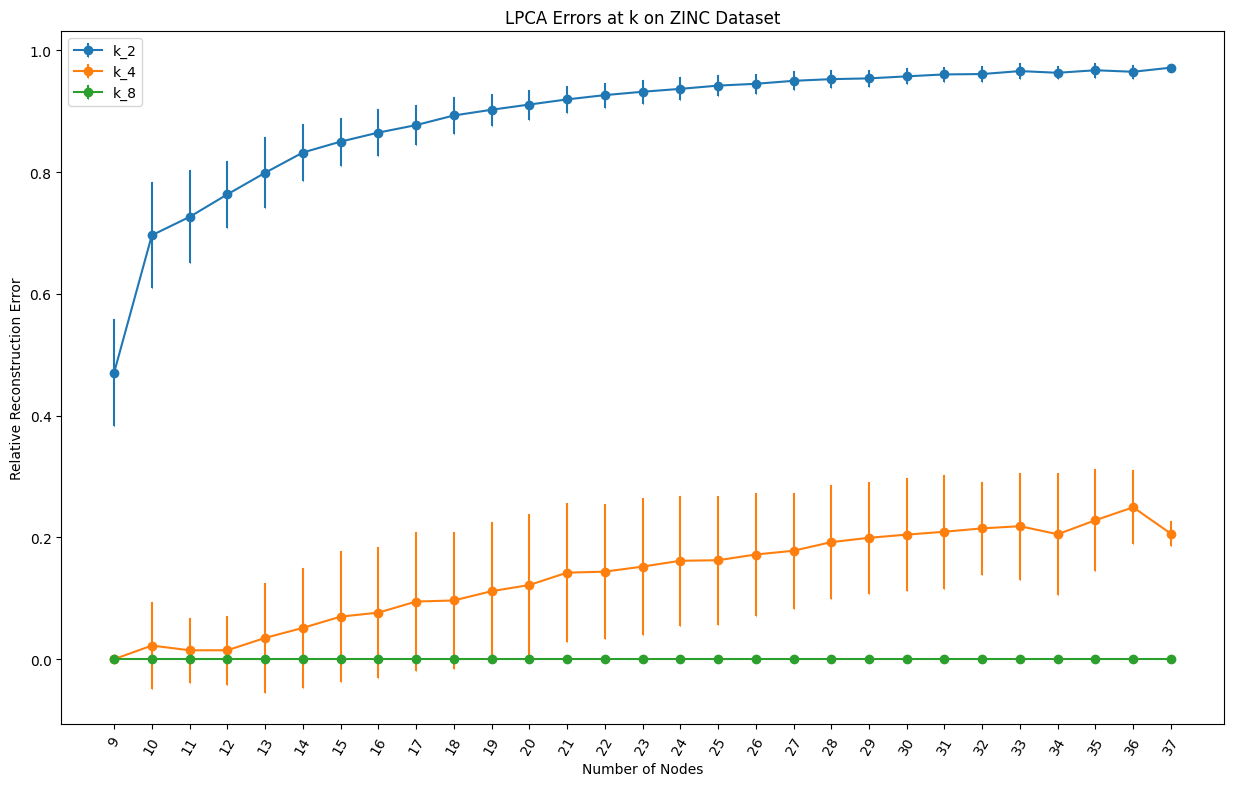

In [47]:
plot_nodes_error_k(lpca, [2, 4, 8], "LPCA Errors at k on ZINC Dataset")

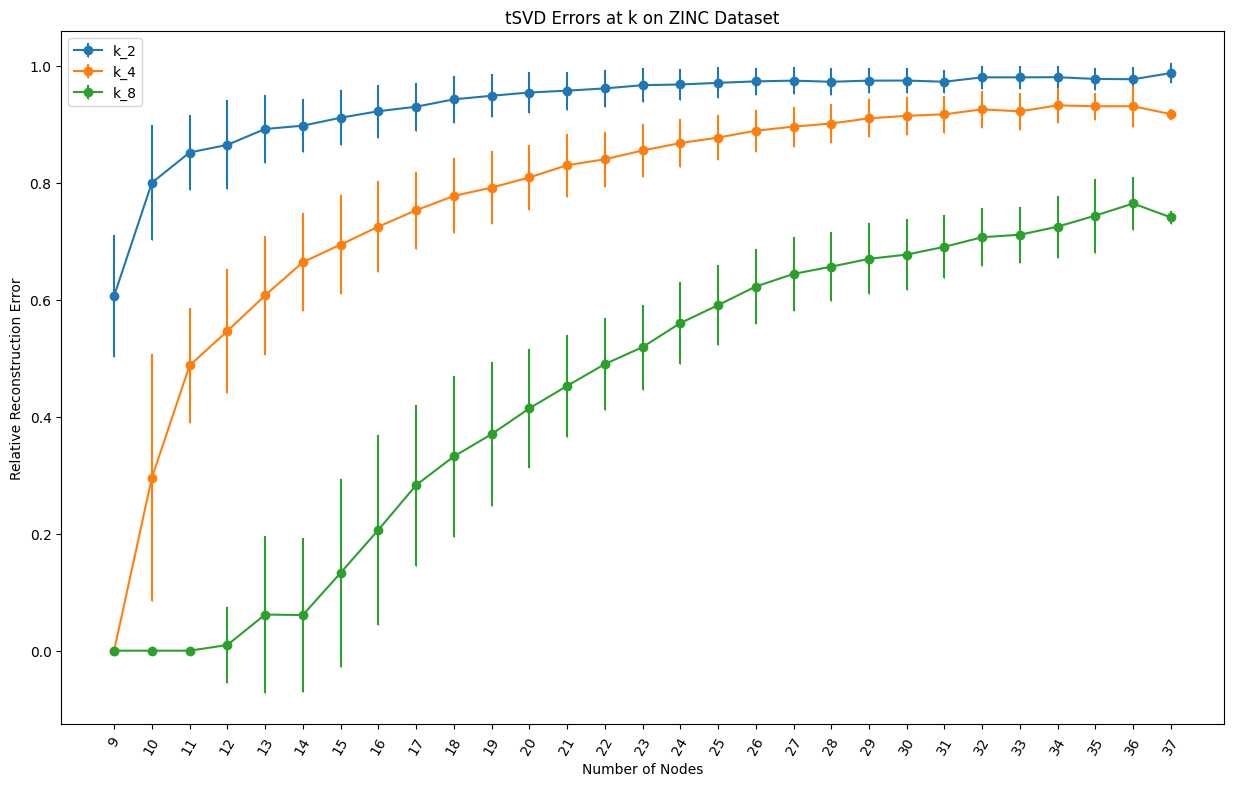

In [48]:
plot_nodes_error_k(tsvd, [2, 4, 8], "tSVD Errors at k on ZINC Dataset")

In [40]:
cifar_8 = pd.read_parquet("results/CIFAR10_LPCA_k_8_save.parquet")

In [42]:
cifar_8["error"].mean()

np.float64(2.2020111315986552e-05)